In [30]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [31]:
tesst = dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    shuffle=True,
    image_size = (256,256),
    batch_size = 32
)

Found 11 files belonging to 1 classes.


In [32]:
class_names = ['Alexandra Daddario',
 'Anne Hathaway',
 'Chris Evans',
 'Chris Hemsworth',
 'Cristiano Ronaldo',
 'Elizabeth Olsen',
 'Tobey Maguire']

In [33]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0) #creat a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

In [34]:
test_class_name = tesst.class_names

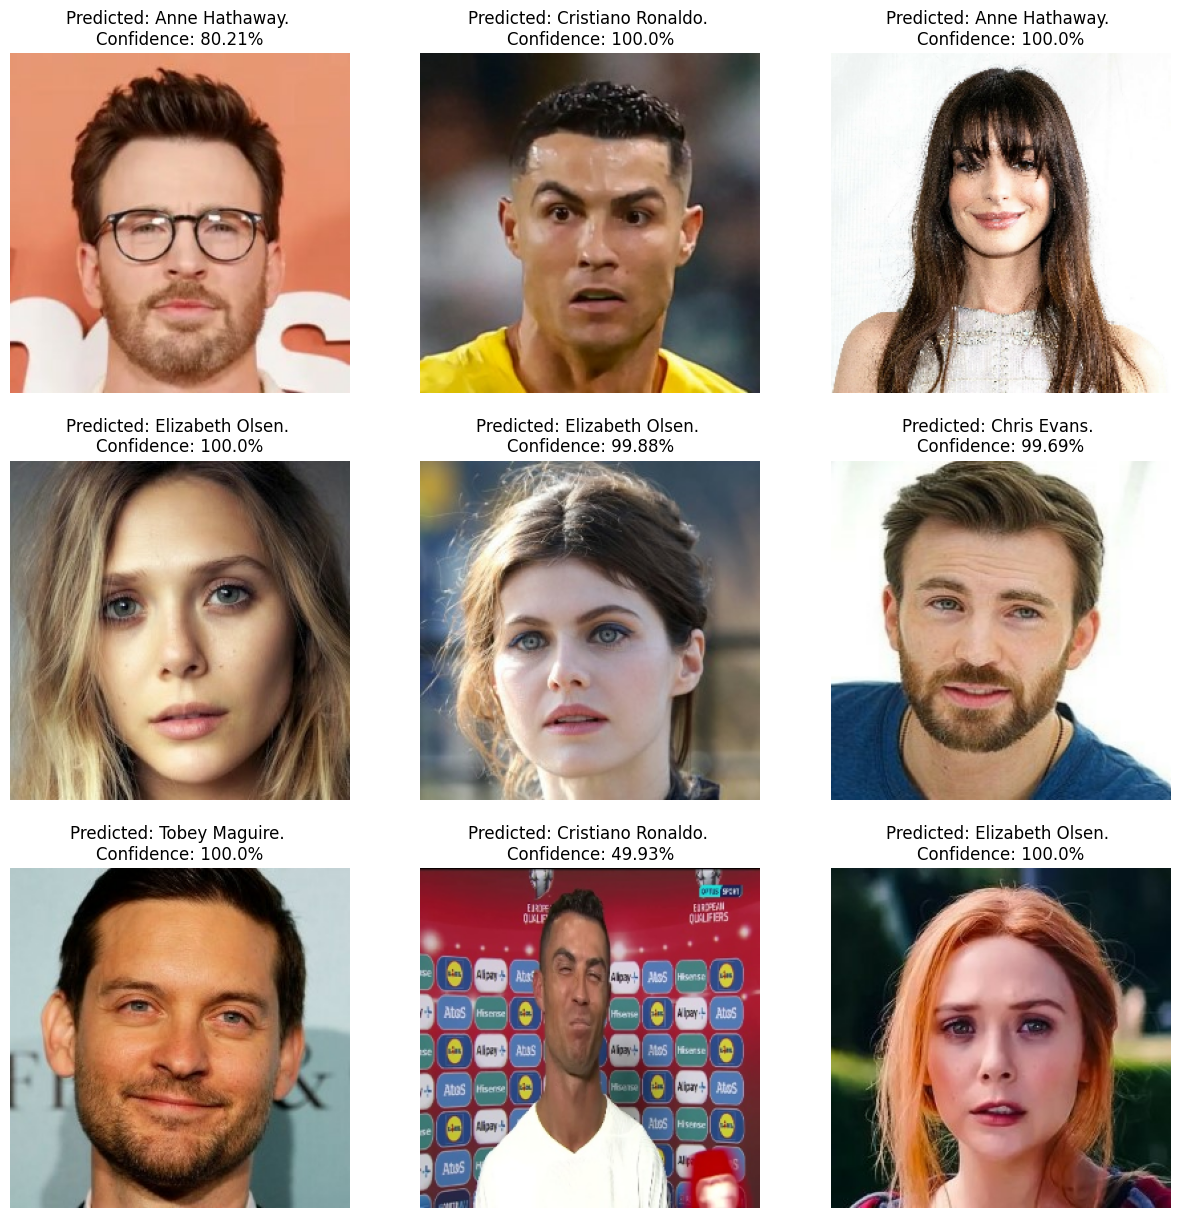

In [36]:
# Load model from saved_model.pb
model = tf.keras.models.load_model('C:/Users/ADMIN/OneDrive - Hanoi University of Science and Technology/Face_recognition/face_recognition/New folder/saved_model/1')  # Thay 'path_to_your_model_directory' bằng đường dẫn thích hợp

plt.figure(figsize=(15,15))
for images, labels in tesst.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())  # Đảm bảo bạn đã định nghĩa hàm predict một cách chính xác
        plt.title(f"Predicted: {predicted_class}. \nConfidence: {confidence}%")
        plt.axis("off")
plt.show()
